In [10]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
## Problem 1

# Constant array with value -3, length 5.
index = np.array([2,4,6,8,10])
val = np.array([-3,-3,-3,-3,-3])
s1 = pd.Series(val, index=index)

# Data given by the dictionary
d = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
s2 = pd.Series(d)

print(s1)
print(s2)

2    -3
4    -3
6    -3
8    -3
10   -3
dtype: int64
Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


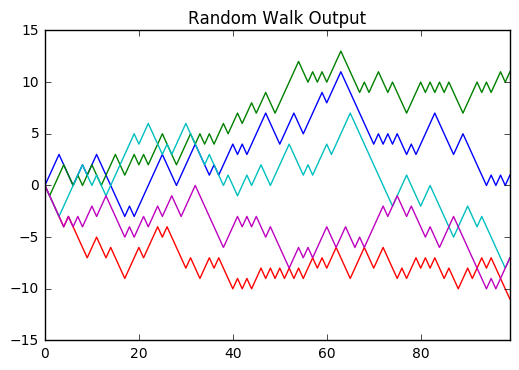

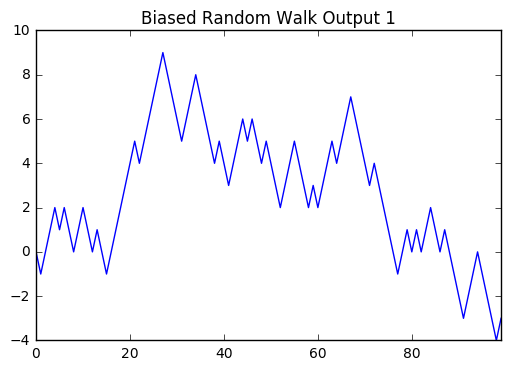

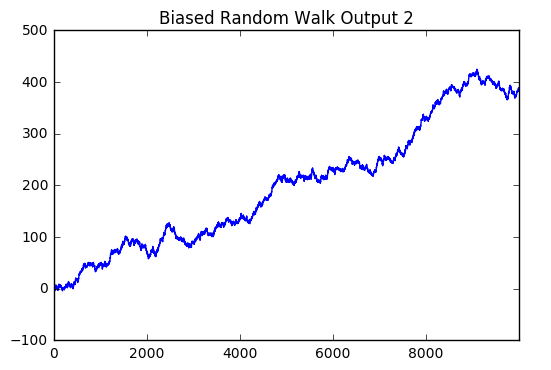

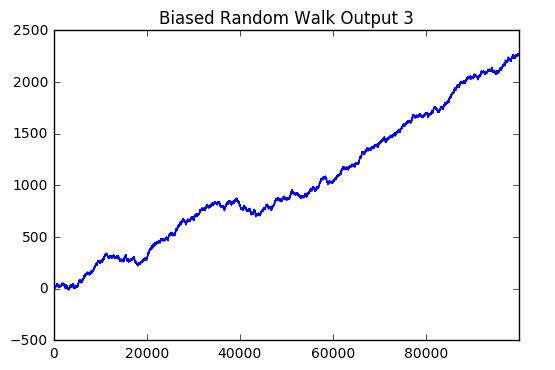

In [19]:
## Problem 2

N = 100

s1 = np.zeros(N)
s1[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1
s1 = pd.Series(s1)
s1 = s1.cumsum() 
s1.plot()

s2 = np.zeros(N)
s2[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1 
s2 = pd.Series(s2)
s2 = s2.cumsum() 
s2.plot()

s3 = np.zeros(N)
s3[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1 
s3 = pd.Series(s3)
s3 = s3.cumsum() 
s3.plot()

s4 = np.zeros(N)
s4[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1
s4 = pd.Series(s4)
s4 = s4.cumsum()
s4.plot()

s5 = np.zeros(N)
s5[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1
s5 = pd.Series(s5)
s5 = s5.cumsum() 
s5.plot()

plt.title("Unbiased Random Walk Output")
plt.show()

N=100
s1 = np.zeros(N)
s1[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1
s1 = pd.Series(s1)
s1 = s1.cumsum() 
s1.plot()

plt.title("Biased Random Walk Output 1")
plt.show()

N=10000
s1 = np.zeros(N)
s1[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1
s1 = pd.Series(s1)
s1 = s1.cumsum() 
s1.plot()

plt.title("Biased Random Walk Output 2")
plt.show()

N=100000
s1 = np.zeros(N)
s1[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1
s1 = pd.Series(s1)
s1 = s1.cumsum() 
s1.plot()

plt.title("Biased Random Walk Output 3")
plt.show()

    



In [31]:
## Problem 3

name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})


studentInfo[(studentInfo['Age']>19) & (studentInfo['Sex']=='M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


In [43]:
## Problem 4

reduced1 = pd.merge(studentInfo, otherInfo, on='ID', how='outer')[['ID','Age','GPA', 'Sex']]
reduced2 = reduced1[reduced1['Sex']=='M'][['ID','Age','GPA']]
reduced2

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


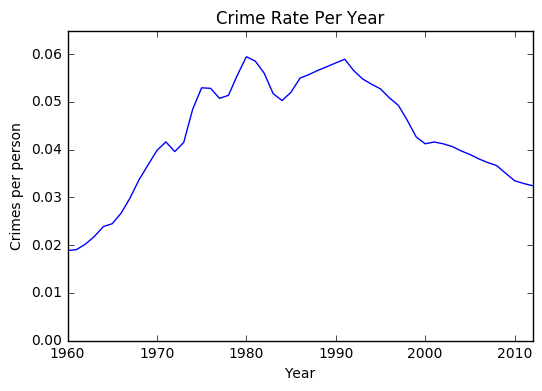

The years with the highest crime rates were:
    Year      Rate
20  1980  0.059500
31  1991  0.058978
21  1981  0.058582
30  1990  0.058203
29  1989  0.057410
The average number of burglaries was 2446286.2075471696
The average number of total crimes was 10638068.075471697
Years with low crimes but high burglaries:
    Year     Total  Burglary
13  1973   8718100   2565500
14  1974  10253400   3039200


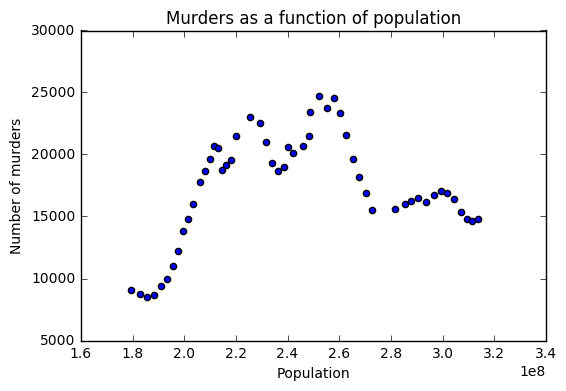

In [110]:
## Problem 5

df1 = pd.read_csv('crime_data.txt', skiprows=1, header=0)
df1['Rate'] = df1['Total']/df1['Population']

#Plot crime rate per year
plt.plot(df1['Year'],df1['Rate'])
plt.axis([1960,2012,0,0.065])
plt.title("Crime Rate Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes per person")
plt.show()

#List the 5 years with the highest crime rate in descending order
df2 = df1.nlargest(5,'Rate')[['Year','Rate']]
print("The years with the highest crime rates were:")
print(df2)

#Calculate the average number of total crimes as well as burglary crimes between 1960 and 2012.
burglaries = df1["Burglary"].mean()
total = df1["Total"].mean()

print("The average number of burglaries was " + str(burglaries))
print("The average number of total crimes was " + str(total))

#Find the years for which the total number of crimes was below average,but the number of burglaries was above average.
df3 = df1[(df1['Total'] < total) & (df1['Burglary'] > burglaries)][['Year','Total','Burglary']]
print("Years with low crimes but high burglaries:")
print(df3)

#Plot the number of murders as a function of the population
plt.scatter(df1['Population'],df1['Murder'])
plt.title("Murders as a function of population")
plt.xlabel("Population")
plt.ylabel("Number of murders")
plt.show()

#Select the Population, Violent, and Robbery columns for all years in the 1980s.
df4 = df1[(df1['Year'] > 1979) & (df1['Year']<1990)][['Population','Violent','Robbery']]
df4.to_csv("crime_subset.txt")